# Prophet

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
t = "precip"

## Avarage temperature

**Read Data**

In [4]:
train_path = f'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/{t}/train_1d.csv'
test_path = f'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/{t}/test_1d.csv'
full_path = f'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/{t}/full_1d.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
full_data = pd.read_csv(full_path)
train_data = train_data.rename(columns={"date": "ds", f"{t}": "y"})
test_data = test_data.rename(columns={"date": "ds", f"{t}": "y"})
full_data = full_data.rename(columns={"date": "ds", f"{t}": "y"})

In [5]:
display(train_data.tail(), train_data.shape)
display(test_data.tail(), test_data.shape)
display(full_data.tail(), full_data.shape)

,ds,y
1456,2014-12-27,1.440903
1457,2014-12-28,8.857101
1458,2014-12-29,1.661953
1459,2014-12-30,6.026414
1460,2014-12-31,0.104725


(1461, 2)

,ds,y
360,2015-12-27,0.490057
361,2015-12-28,0.000000
362,2015-12-29,0.080574
363,2015-12-30,0.266196
364,2015-12-31,0.544298


(365, 2)

,ds,y
1821,2015-12-27,0.490057
1822,2015-12-28,0.000000
1823,2015-12-29,0.080574
1824,2015-12-30,0.266196
1825,2015-12-31,0.544298


(1826, 2)

**Model**

In [6]:
model = Prophet()
model.fit(train_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2015-12-27,0.845954,-2.471894,4.331617
1822,2015-12-28,1.041227,-2.460465,4.613274
1823,2015-12-29,0.936997,-2.559105,4.351875
1824,2015-12-30,0.769286,-2.629896,4.104126
1825,2015-12-31,0.884271,-2.504645,4.326189


**Test data**

In [8]:
test_data['yhat'] = forecast[-365:].yhat.to_numpy()
test_data['yhat_lower'] = forecast[-365:].yhat_lower.to_numpy()
test_data['yhat_upper'] = forecast[-365:].yhat_upper.to_numpy()

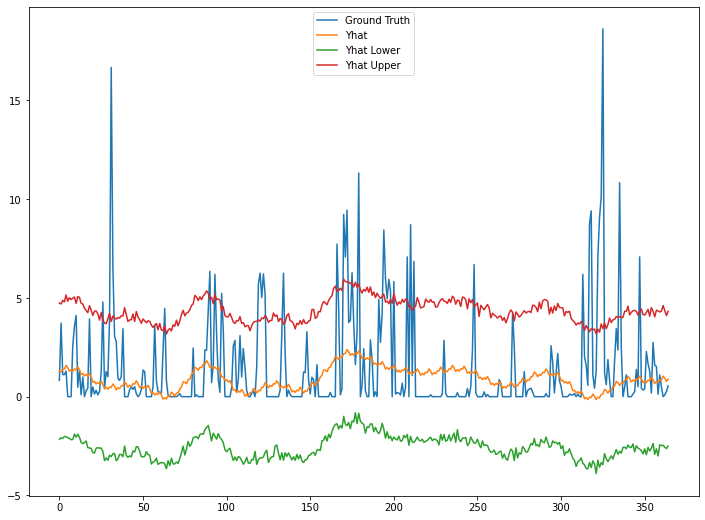

In [9]:
test_data.y.plot();
test_data.yhat.plot();
test_data.yhat_lower.plot();
test_data.yhat_upper.plot();
plt.legend(["Ground Truth", "Yhat", "Yhat Lower", "Yhat Upper"]);

In [10]:
print(f"RMSE Yhat:\t{mean_squared_error(test_data.y, test_data.yhat, squared=False)}")
print(f"RMSE Yhat Lower:\t{mean_squared_error(test_data.y, test_data.yhat_lower, squared=False)}")
print(f"RMSE Yhat Upper:\t{mean_squared_error(test_data.y, test_data.yhat_upper, squared=False)}")

RMSE Yhat:	2.6083803761444915
RMSE Yhat Lower:	4.725832707878594
RMSE Yhat Upper:	3.900481388368859


**Full data**

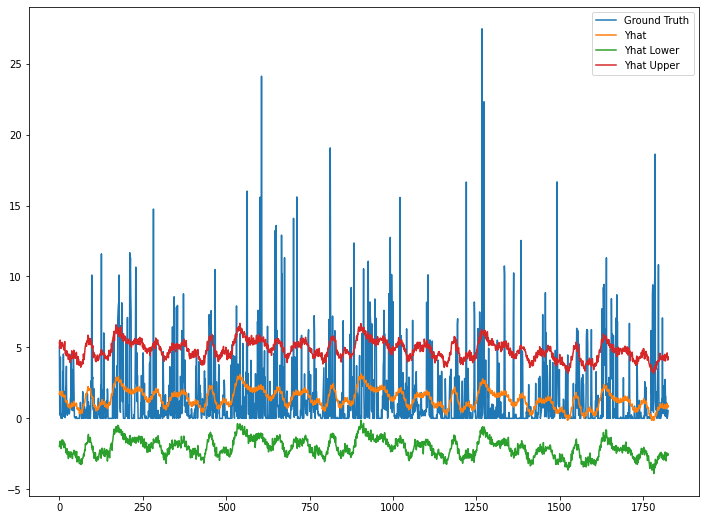

In [11]:
full_data.y.plot();
forecast.yhat.plot();
forecast.yhat_lower.plot();
forecast.yhat_upper.plot();
plt.legend(["Ground Truth", "Yhat", "Yhat Lower", "Yhat Upper"]);